In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib



from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
    "oracle.run2",
    "oracle.run1",
    "cores",
    "metehan",
    "wisig",
    "oracle.run1.framed",
    "oracle.run2.framed",
]

experiments = {}

for experiment in experiments_to_get:
    print(experiment)
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "tuned_1", experiment)
    )

oracle.run2
oracle.run1
cores
metehan
wisig
oracle.run1.framed
oracle.run2.framed


In [3]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "target_val_label_accuracy",
    "x_transforms_source"
])

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["x_transforms_source"] =  str(trial["parameters"]["x_transforms_source"])
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,target_val_label_accuracy,x_transforms_source
0,oracle.run2,0.726753,0.602604,['unit_mag']
1,oracle.run2,0.684653,0.572917,['unit_power']
2,oracle.run2,0.062500,0.062500,['times_zero']
3,oracle.run2,0.892066,0.772083,[]
4,oracle.run1,0.709097,0.631354,['unit_mag']
5,oracle.run1,0.708438,0.638437,['unit_power']
6,oracle.run1,0.062500,0.062500,['times_zero']
7,oracle.run1,0.862309,0.770521,[]
8,cores,0.985632,0.963602,['unit_mag']
9,cores,0.992098,0.966954,['unit_power']


In [4]:
m = pd.melt(all_trials, 
        id_vars=["experiment_name", "x_transforms_source"], 
        value_vars=[
            "source_val_label_accuracy",
            "target_val_label_accuracy",
        ])
m

,experiment_name,x_transforms_source,variable,value
0,oracle.run2,['unit_mag'],source_val_label_accuracy,0.726753
1,oracle.run2,['unit_power'],source_val_label_accuracy,0.684653
2,oracle.run2,['times_zero'],source_val_label_accuracy,0.062500
3,oracle.run2,[],source_val_label_accuracy,0.892066
4,oracle.run1,['unit_mag'],source_val_label_accuracy,0.709097
5,oracle.run1,['unit_power'],source_val_label_accuracy,0.708438
6,oracle.run1,['times_zero'],source_val_label_accuracy,0.062500
7,oracle.run1,[],source_val_label_accuracy,0.862309
8,cores,['unit_mag'],source_val_label_accuracy,0.985632
9,cores,['unit_power'],source_val_label_accuracy,0.992098


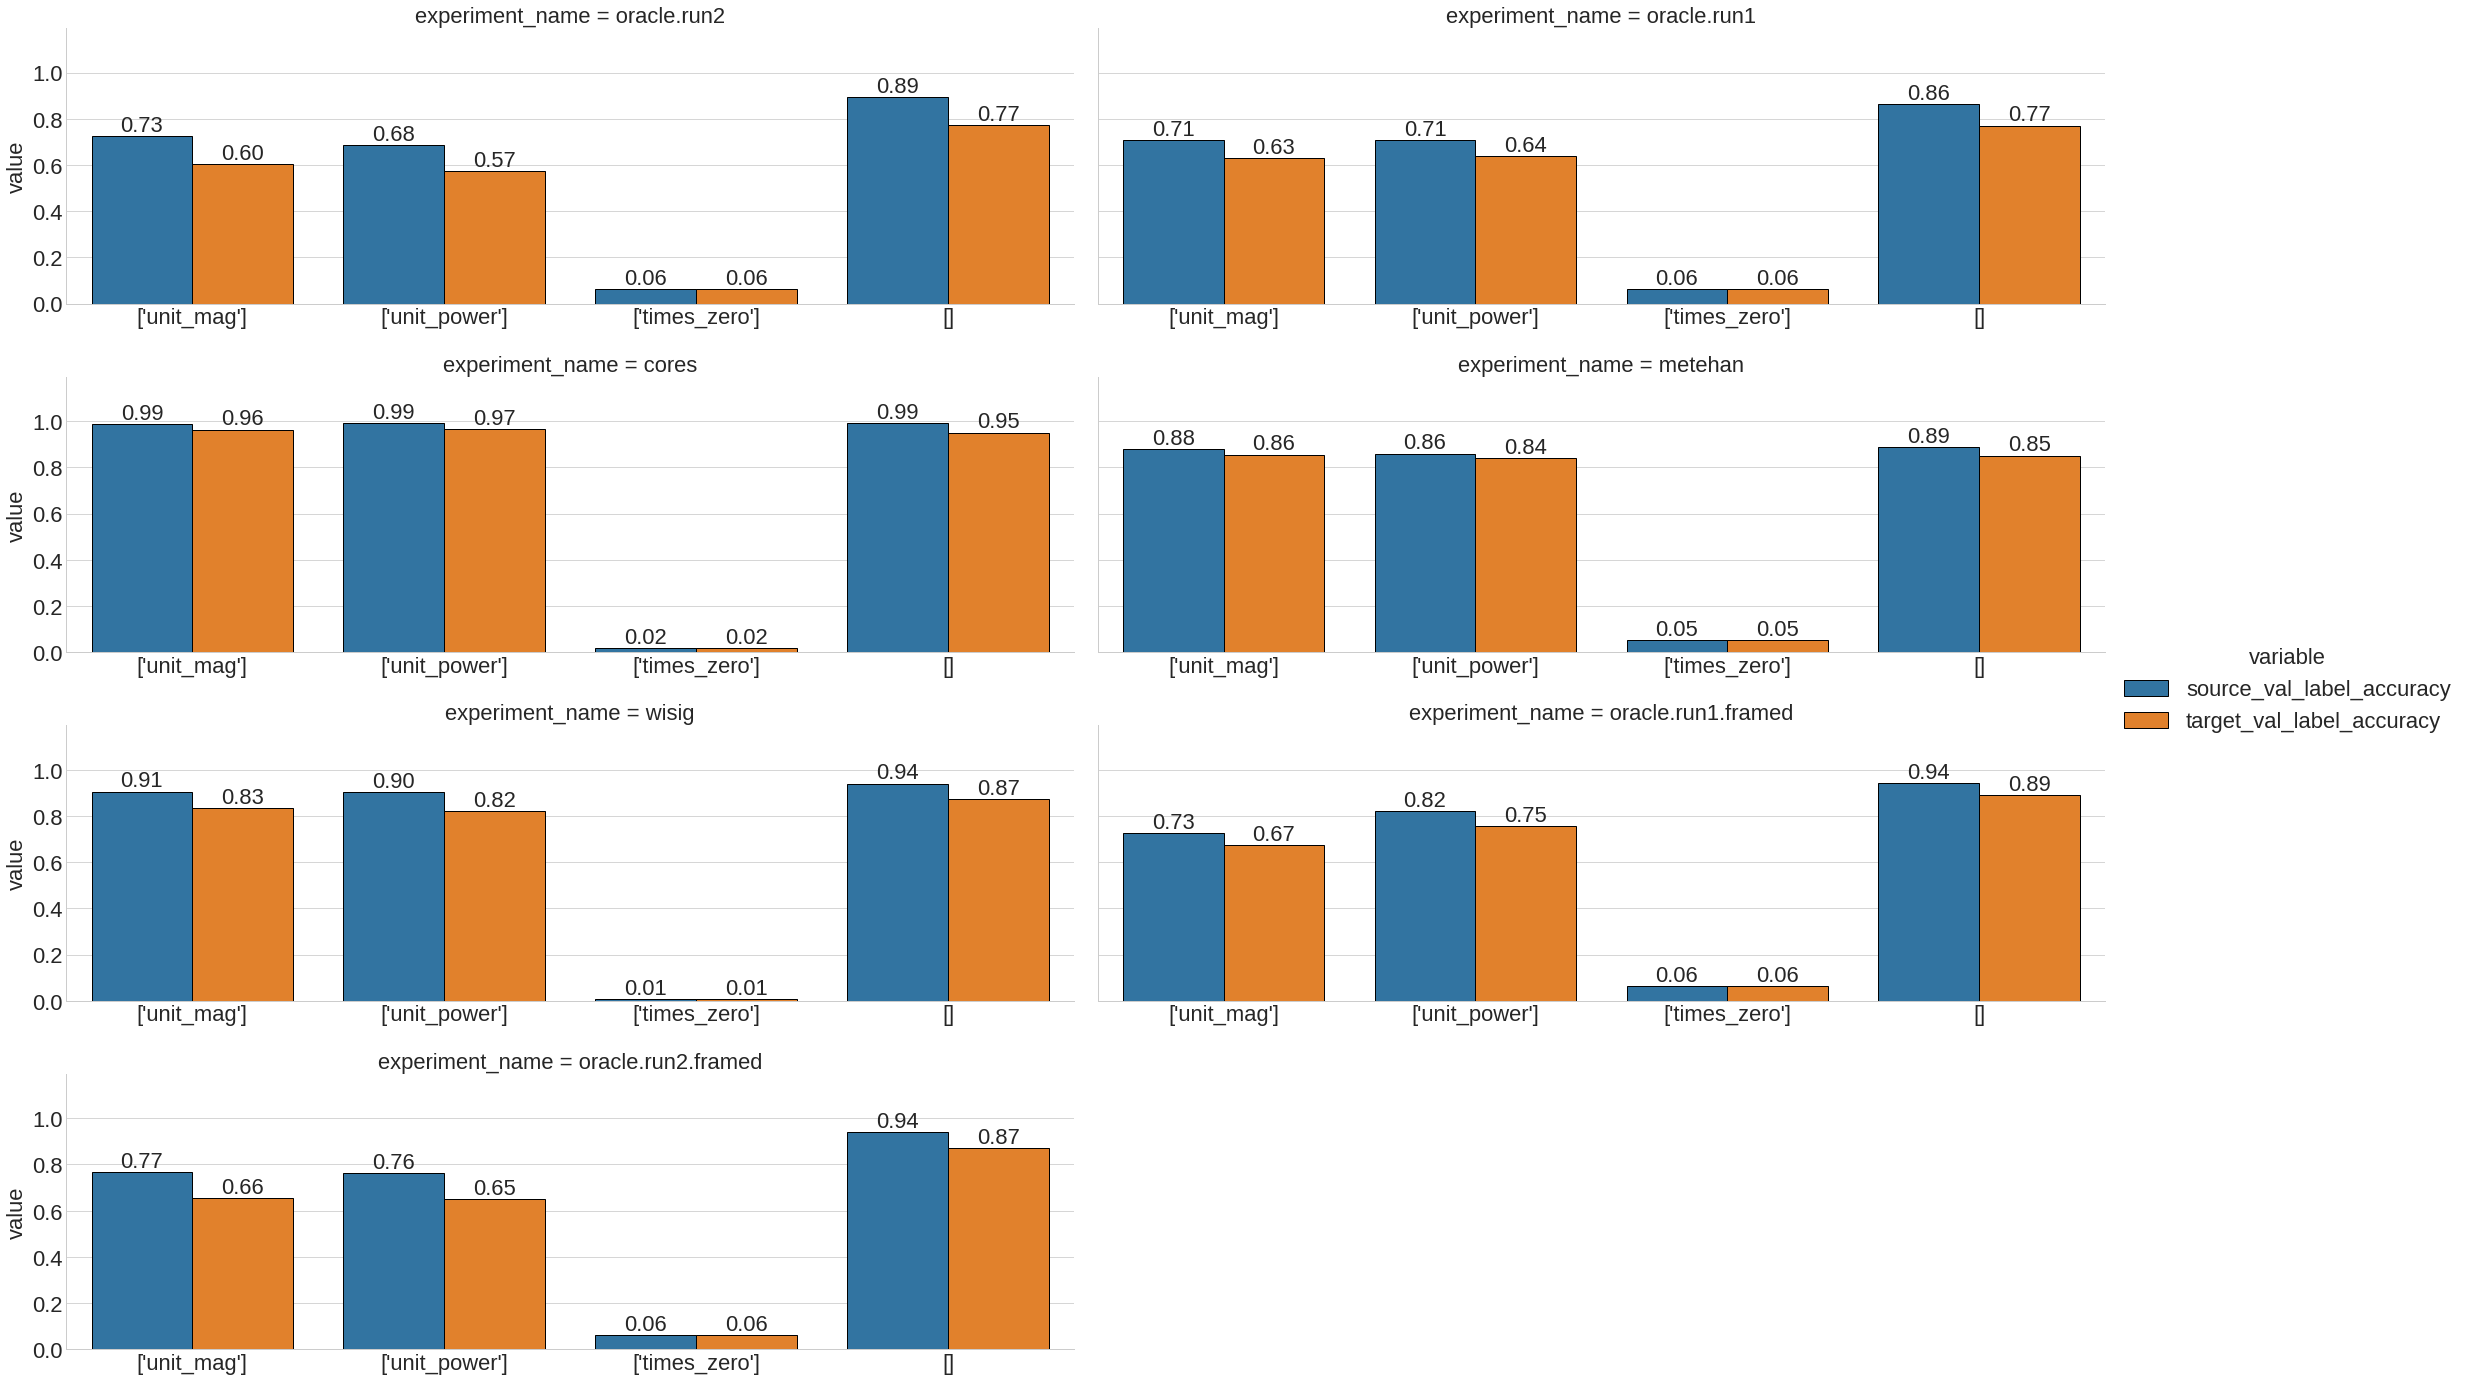

<Figure size 1080x3600 with 0 Axes>

In [10]:
matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

fg = sb.catplot(x='x_transforms_source', col="experiment_name", y='value', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

# iterate through axes
for ax in fg.axes.ravel():
    
    ax.tick_params(labelbottom=True)
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

